In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("dataset_leto.csv", sep=';')
df

,district_name,year,week,ari_0_2,ari_3_6,ari_7_14,ari_15,ari_total,ili_0_2,ili_3_6,...,public_busses_100000,married_1000,mean_incomes,illness_1000,hospitals_10000,gyms_count,employment_ration,emissions_water,divorced_1000,target
0,Биробиджан,2016,22,136,126,24,28,314,0,0,...,91.0,7.4,23069.0,43.5,129.2,110.0,61.4,14.0,4.7,41.991521
1,Биробиджан,2016,23,117,106,28,22,273,0,0,...,91.0,7.4,23069.0,43.5,129.2,110.0,61.4,14.0,4.7,36.508552
2,Биробиджан,2016,24,123,66,25,28,242,0,0,...,91.0,7.4,23069.0,43.5,129.2,110.0,61.4,14.0,4.7,32.362892
3,Биробиджан,2016,25,144,76,21,16,257,0,0,...,91.0,7.4,23069.0,43.5,129.2,110.0,61.4,14.0,4.7,34.368857
4,Биробиджан,2016,26,125,84,25,18,252,0,0,...,91.0,7.4,23069.0,43.5,129.2,110.0,61.4,14.0,4.7,33.700202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,Севастополь,2019,31,362,425,196,109,1092,0,0,...,168.0,8.6,30205.0,28.5,77.8,118.0,58.3,28.8,4.6,25.007443
2798,Севастополь,2019,32,366,465,199,146,1176,0,0,...,168.0,8.6,30205.0,28.5,77.8,118.0,58.3,28.8,4.6,26.931092
2799,Севастополь,2019,33,422,538,259,143,1362,0,0,...,168.0,8.6,30205.0,28.5,77.8,118.0,58.3,28.8,4.6,31.190602
2800,Севастополь,2019,34,274,433,156,119,982,0,0,...,168.0,8.6,30205.0,28.5,77.8,118.0,58.3,28.8,4.6,22.488378


## Будем решать задачу регрессии заболеваемости гриппом и ОРВИ в межэпидемический интервал времени (22-35 недели) для разных возрастных групп

In [14]:
features = ['district_name', 'year', 'week', 'ari_0_2', 'ari_3_6', 'ari_7_14',
       'ari_15', 'ari_total', 'ili_0_2', 'ili_3_6', 'ili_7_14',
       'ili_15', 'ili_total', 'pop_0_2', 'pop_3_6', 'pop_7_14',
       'pop_15', 'pop_total', 'density', 'metro_flag', 'sea_flag',
       'happiness', 'mean_temp', 'mean_humidity', 'mean_pressure',
       'mean_wind_velocity', 'target_0_2', 'target_3_6', 'target_7_14',
       'target_15', 'target_total',
       'cultural_viewers_1000', 'tourists_russia_thousands',
       'stadiums_count', 'migration_1000',
       'emissions_air', 'doctors_1000', 'public_busses_100000', 'married_1000',
       'mean_incomes', 'illness_1000', 'hospitals_10000', 'gyms_count',
       'employment_ration', 'emissions_water', 'divorced_1000', 'target']

In [15]:
train_dataset = df[df['year']!=2019]
test_dataset = df[df['year']==2019]

### Возрастная группа 0-2 лет

In [169]:
features_0_2 = ['density', 'metro_flag', 'sea_flag',
       'happiness', 'mean_temp', 'mean_humidity', 'mean_pressure',
       'mean_wind_velocity', 'target_0_2', 'tourists_russia_thousands',
       'stadiums_count', 'migration_1000',
       'emissions_air', 'doctors_1000', 'public_busses_100000', 'married_1000',
       'mean_incomes', 'hospitals_10000', 'gyms_count',
       'employment_ration', 'emissions_water', 'divorced_1000']

X_train = train_dataset[features_0_2].drop(columns=['target_0_2'])
X_test = test_dataset[features_0_2].drop(columns=['target_0_2'])
y_train = train_dataset[features_0_2]['target_0_2']
y_test = test_dataset[features_0_2]['target_0_2']

In [170]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train, verbose=False)

In [171]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

61.88730323914014

In [172]:
y_test.describe()

count    826.000000
mean     186.870879
std       92.857746
min        0.000000
25%      129.925635
50%      180.859107
75%      235.769204
max      578.192579
Name: target_0_2, dtype: float64

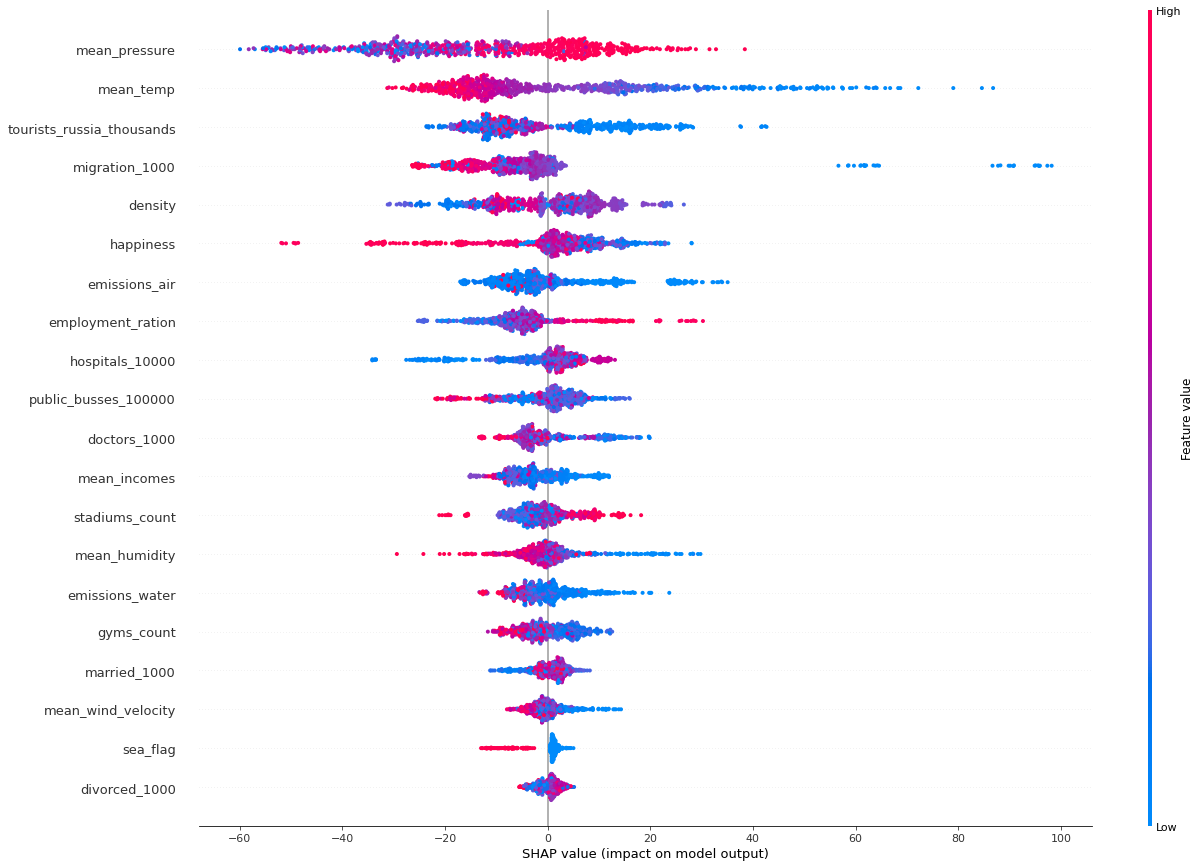

In [173]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(20, 15))

### Возрастная группа 3-6 лет

In [159]:
features_3_6 = ['density', 'metro_flag', 'sea_flag',
       'happiness', 'mean_temp', 'mean_humidity', 'mean_pressure',
       'mean_wind_velocity', 'target_3_6',
       'cultural_viewers_1000', 'tourists_russia_thousands',
       'stadiums_count', 'migration_1000',
       'emissions_air', 'doctors_1000', 'public_busses_100000', 'married_1000',
       'mean_incomes', 'hospitals_10000', 'gyms_count',
       'employment_ration', 'emissions_water', 'divorced_1000']

X_train = train_dataset[features_3_6].drop(columns=['target_3_6'])
X_test = test_dataset[features_3_6].drop(columns=['target_3_6'])
y_train = train_dataset[features_3_6]['target_3_6']
y_test = test_dataset[features_3_6]['target_3_6']

In [160]:
model = CatBoostRegressor()
model.fit(X_train, y_train, verbose=False)

In [161]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

57.50170942766321

In [162]:
y_test.describe()

count    826.000000
mean     166.221388
std       78.451181
min        0.000000
25%      117.847344
50%      164.207179
75%      212.000487
max      613.289187
Name: target_3_6, dtype: float64

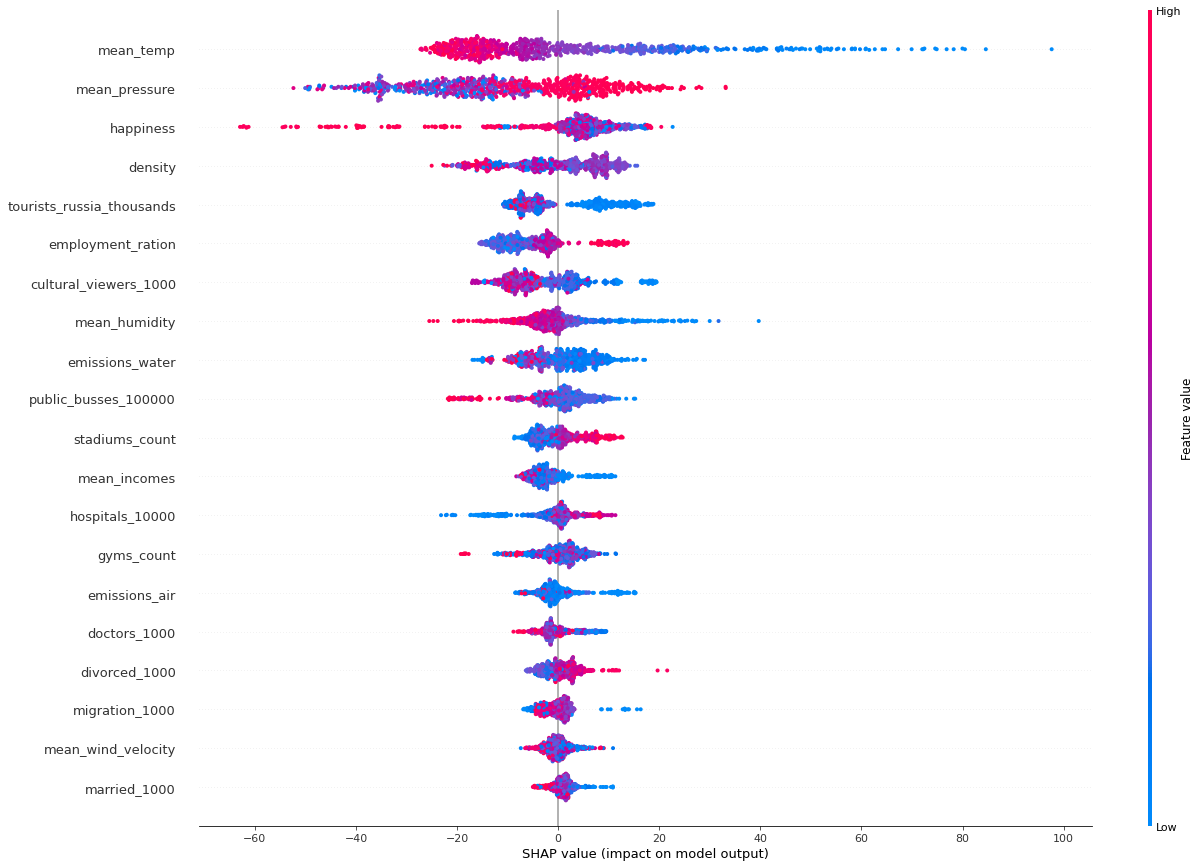

In [163]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(20, 15))

### Возрастная группа 7-14 лет

In [164]:
features_7_14 = ['density', 'sea_flag',
       'happiness', 'mean_temp', 'mean_humidity', 'mean_pressure',
       'mean_wind_velocity', 'target_7_14',
       'tourists_russia_thousands',
       'stadiums_count', 'migration_1000',
       'doctors_1000', 'public_busses_100000', 'married_1000',
       'mean_incomes', 'hospitals_10000', 'gyms_count',
       'employment_ration', 'divorced_1000']

X_train = train_dataset[features_7_14].drop(columns=['target_7_14'])
X_test = test_dataset[features_7_14].drop(columns=['target_7_14'])
y_train = train_dataset[features_7_14]['target_7_14']
y_test = test_dataset[features_7_14]['target_7_14']

In [165]:
model = CatBoostRegressor()
model.fit(X_train, y_train, verbose=False)

In [166]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

14.592876719664098

In [167]:
y_test.describe()

count    826.000000
mean      38.419868
std       18.626969
min        0.238937
25%       27.518728
50%       37.994130
75%       47.828865
max      114.334293
Name: target_7_14, dtype: float64

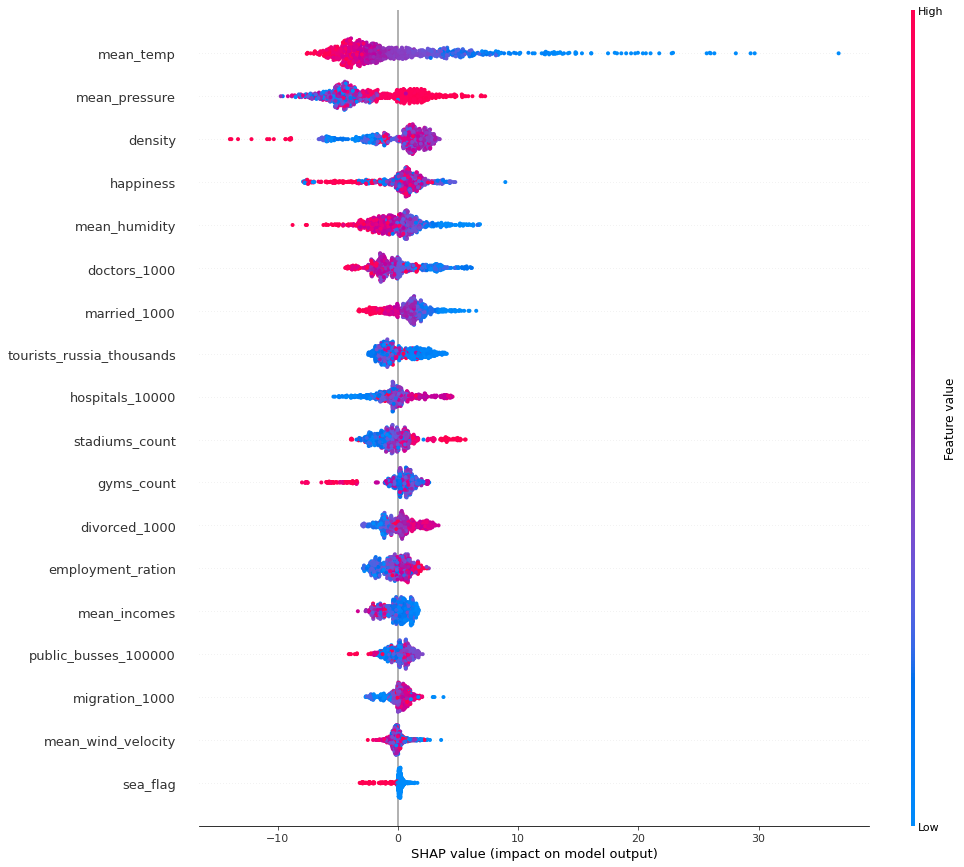

In [168]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(15, 15))